[tutorial: working with tensors](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)

Note: that operators ending with an underscore are "in-place operators" (modifiying the operand in place).

In [2]:
import torch
import numpy as np

# converting from np -> torch.tensor
data = np.array([[1,2], [3,4]])
display(data)
t_data = torch.from_numpy(data)
display(t_data)

# get tensor as np object (note both objects will share the same memory!)
print('converted to np.array:')
tmp = t_data.numpy()
display(tmp)

t_data.add_(1)
display(tmp)

# matrix multiplication (t_data multiplied by its transpose)
print('result of matrix multiplication:')
res = t_data.mul(t_data.T)
display(res)
print("equivalently:")
display(t_data @ t_data.T)

print(".item() converts scalars back to python datatypes:")
var = torch.tensor(5).item()
print(f"var={var} has type {type(var)}")

array([[1, 2],
       [3, 4]])

tensor([[1, 2],
        [3, 4]])

converted to np.array:


array([[1, 2],
       [3, 4]])

array([[2, 3],
       [4, 5]])

result of matrix multiplication:


tensor([[ 4, 12],
        [12, 25]])

equivalently:


tensor([[13, 23],
        [23, 41]])

.item() converts scalars back to python datatypes:
var=5 has type <class 'int'>


[tutorial: datasets](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

[tutorial: transforms](https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html), [transforms API](https://pytorch.org/vision/stable/transforms.html)


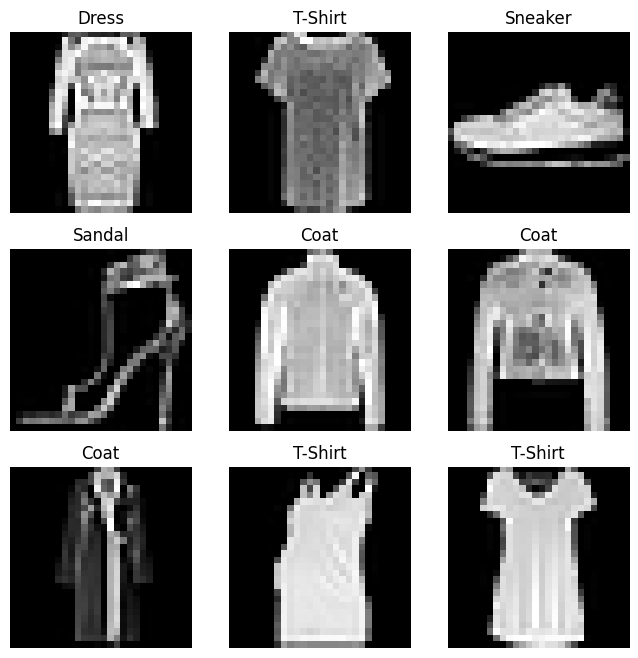

practicing transforms:
type(img)=<class 'torch.Tensor'>, type(label)=<class 'int'>
label = 6
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0000, 0.0000, 0.3412, 0.4235, 0.3922, 0.3922,
          0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.6118, 0.7373, 0.3255, 0.5647, 0.8039,
          0.4314, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.2627, 0.5412, 0.5647, 0.8902, 0.4275, 0.6353, 0.6039,
          0.3765, 0.5725, 0.2902, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0588,
          0.6078, 0.5608, 0.5569, 0.50

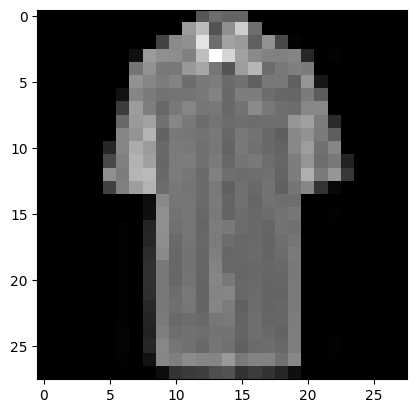

In [3]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    # The FashionMNIST features are in PIL Image format
    #   ToTensor converts a PIL image or NumPy ndarray into a FloatTensor
    #   and scales the image’s pixel intensity values in the range [0., 1.]
    transform=ToTensor(),
    # if we include this line, labels get mapped to tensors instead of being a single int
    #target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# visualizing items in dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

print("practicing transforms:")
sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]
print(f"type(img)={type(img)}, type(label)={type(label)}")
print(f"label = {label}")
print(img)
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#img = transforms.RandAugment().forward(img)
#plt.imshow(img.squeeze(), cmap="gray")
#plt.show()

[tutorial: Build the Neual Network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)

In [4]:
import importlib
import quickstart as qs
importlib.reload(qs)

model = qs.NeuralNetwork()
print(f"model = \n{model}")

sub = model.get_submodule("linear_relu_stack.0")
print(f"\nsub =\n{sub}")
print(type(sub))

print('\niterating over modules in network')
for i, mod in enumerate(model.modules()):
    print(f'module {i}:')
    print(mod)

print('\niterating over parameters in network')
for name, param in model.named_parameters():
    print(f"{name} -> {param}")

model = 
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

sub =
Linear(in_features=784, out_features=512, bias=True)
<class 'torch.nn.modules.linear.Linear'>

iterating over modules in network
module 0:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
module 1:
Flatten(start_dim=1, end_dim=-1)
module 2:
Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): R

Here we explore the effects of different types of layers (still based on the same tutorial).

type(img) = <class 'torch.Tensor'>, size = torch.Size([1, 28, 28])
type(flat_img) = <class 'torch.Tensor'>, size = torch.Size([1, 784])

type(hidden1) = <class 'torch.Tensor'>, size = torch.Size([1, 15])
hidden1 =
tensor([[ 0.0826, -0.2546, -0.3019,  0.1596, -0.0519, -0.0528,  0.0895,  0.0750,
          0.0419, -0.0420,  0.1126,  0.1771,  0.1982,  0.0055,  0.0989]],
       grad_fn=<AddmmBackward0>)
hidden1 (after ReLU)=
tensor([[0.0826, 0.0000, 0.0000, 0.1596, 0.0000, 0.0000, 0.0895, 0.0750, 0.0419,
         0.0000, 0.1126, 0.1771, 0.1982, 0.0055, 0.0989]],
       grad_fn=<ReluBackward0>)

type(output) = <class 'torch.Tensor'>, size = torch.Size([1, 15]), output =
tensor([[0.0826, 0.0000, 0.0000, 0.1596, 0.0000, 0.0000, 0.0895, 0.0750, 0.0419,
         0.0000, 0.1126, 0.1771, 0.1982, 0.0055, 0.0989]],
       grad_fn=<ReluBackward0>)


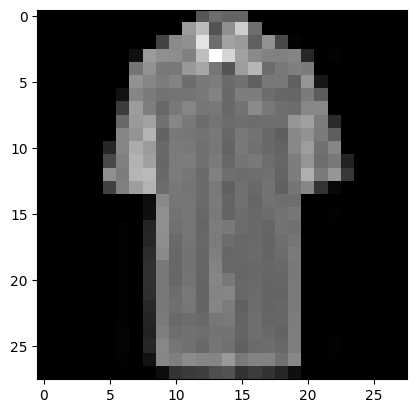

In [26]:
import torch
from torch import nn
# effect of the nn.Flatten layer
print(f"type(img) = {type(img)}, size = {img.size()}")
flat_img = model.flatten(img)
print(f"type(flat_img) = {type(flat_img)}, size = {flat_img.size()}")

plt.imshow(img.squeeze(), cmap="gray")

# effect of a linear layer:
#   this is basically a layer of 15 nodes, which takes input of size 28*28=784
layer1 = nn.Linear(28 * 28, 15)
hidden1 = layer1(flat_img)
print(f"\ntype(hidden1) = {type(hidden1)}, size = {hidden1.size()}")

print(f"hidden1 =\n{hidden1}")
hidden1 = nn.ReLU()(hidden1)
print(f"hidden1 (after ReLU)=\n{hidden1}")

# we can get the same output like so
seq_modules = nn.Sequential(
  nn.Flatten(),
  layer1,
  nn.ReLU(),
)

output = seq_modules(img)
print(f"\ntype(output) = {type(output)}, size = {output.size()}, output =\n{output}")
assert torch.all(torch.eq(hidden1, output))
